In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

In [4]:
data = pd.read_csv(r'C:\Users\pranj\Desktop\Datasets\Time Series Datasets\yahoo_stock.csv')
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [5]:
data.index = pd.to_datetime(data['Date'])
data.drop(columns=['Date'],inplace=True)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


In [6]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


# Plotting the data

<AxesSubplot:xlabel='Date'>

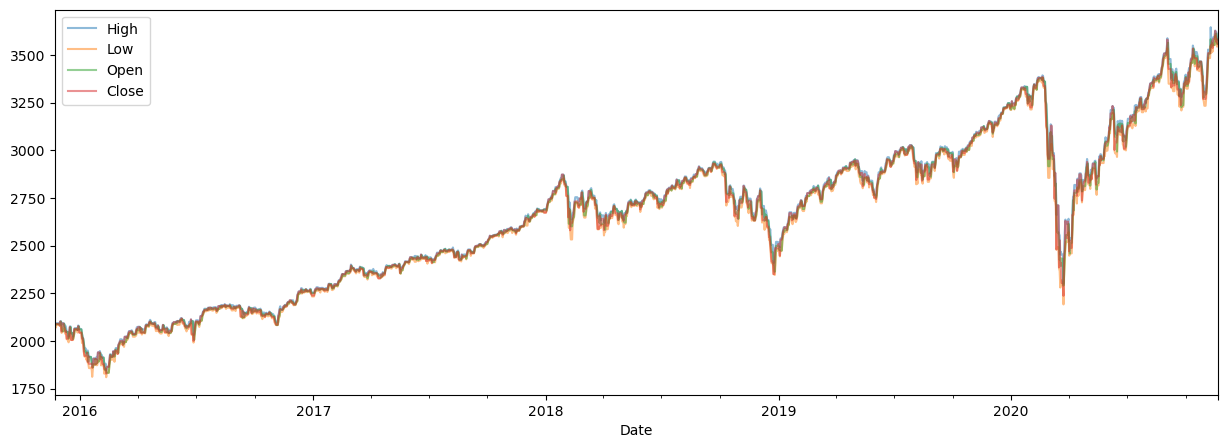

In [7]:
data[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)

# Plotting Trend, Seasonal and Residual

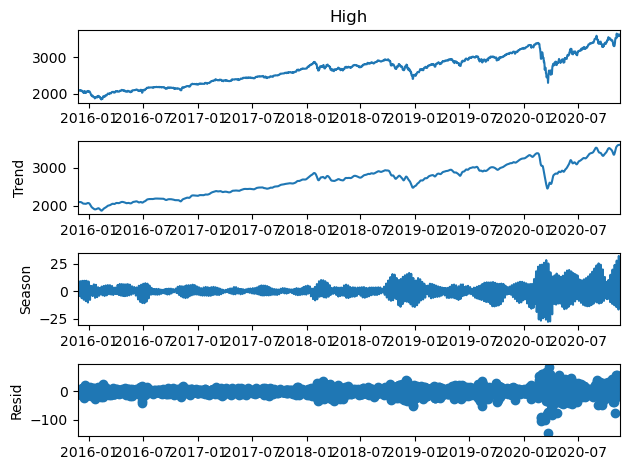

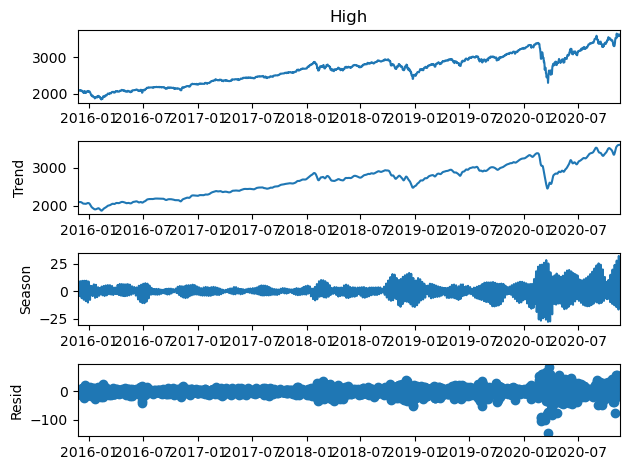

In [14]:
from statsmodels.tsa.seasonal import STL
seasonal_decompose_data = STL(data["High"], seasonal= 11).fit()
seasonal_decompose_data.plot()

# Statistical Adfuller Test for Null Hypothesis

In [15]:
from statsmodels.tsa.stattools import adfuller
data_test = adfuller(data.High, autolag = 'AIC')
print("1. ADF : ",data_test[0])
print("2. P-Value : ", data_test[1])
print("3. Num Of Lags : ", data_test[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", data_test[3])
print("5. Critical Values :")
for key, val in data_test[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.7135984370545913
2. P-Value :  0.8431957237480057
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1799
5. Critical Values :
	 1% :  -3.433990164137254
	 5% :  -2.8631479299063405
	 10% :  -2.567626009684832


# Plotting Autocorrelation and Partial Autocorrelation

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

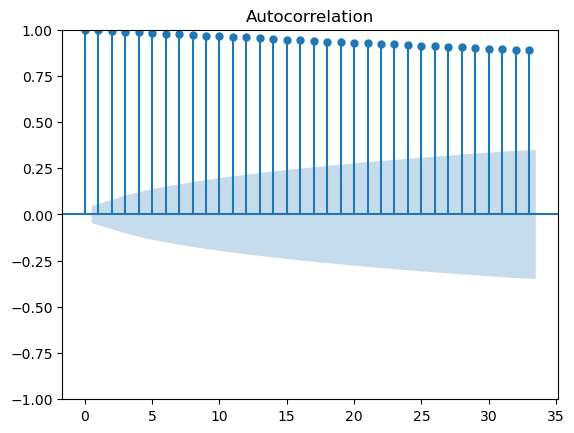

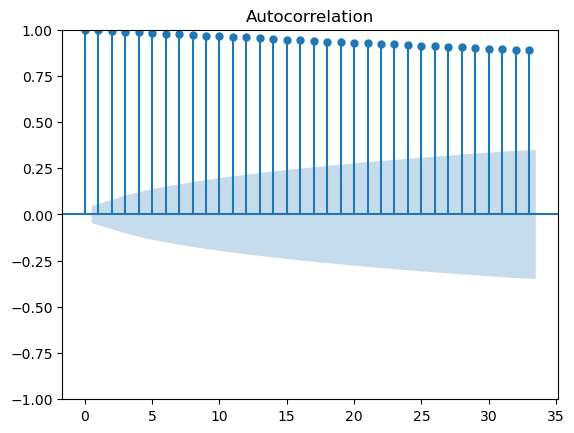

In [17]:
plot_acf(data['High'])

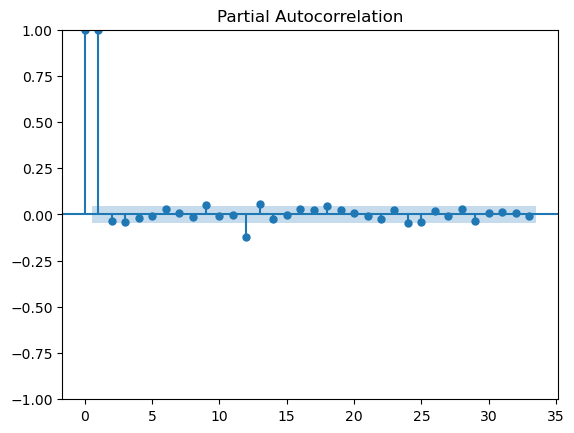

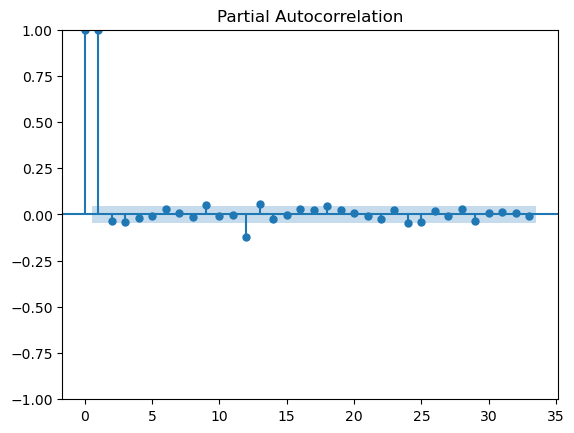

In [19]:
import warnings
warnings.filterwarnings("ignore") 
plot_pacf(data['High'])

# Making SARIMAX model 

In [20]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data['High'],exog=data['Adj Close'], order=(3, 1, 0),seasonal_order=(1,1,1,12))
results = model.fit()

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 High   No. Observations:                 1825
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -7402.079
Date:                              Sun, 18 Dec 2022   AIC                          14818.158
Time:                                      13:15:27   BIC                          14856.673
Sample:                                  11-23-2015   HQIC                         14832.370
                                       - 11-20-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Adj Close      0.6780      0.005    125.318      0.000       0.667       0.689
ar.L1         -0.4068      0.011    -35.491      0.000      -0.429      -0.384
ar.L2         -0.2117      0.014    -14.930      0.000      -0.239      -0.184
ar.L3         -0.1597      0.012    -13.091      0.000      -0.184      -0.136
ar.S.L12      -0.0675      0.017     -3.874      0.000      -0.102      -0.033
ma.S.L12      -0.9943      0.010   -103.639      0.000      -1.013      -0.975
sigma2       200.9659      2.483     80.944      0.000     196.100     205.832
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):             16770.20
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               8.19   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Plotting our model's Forcast with the acutal Data 

<AxesSubplot:xlabel='Date'>

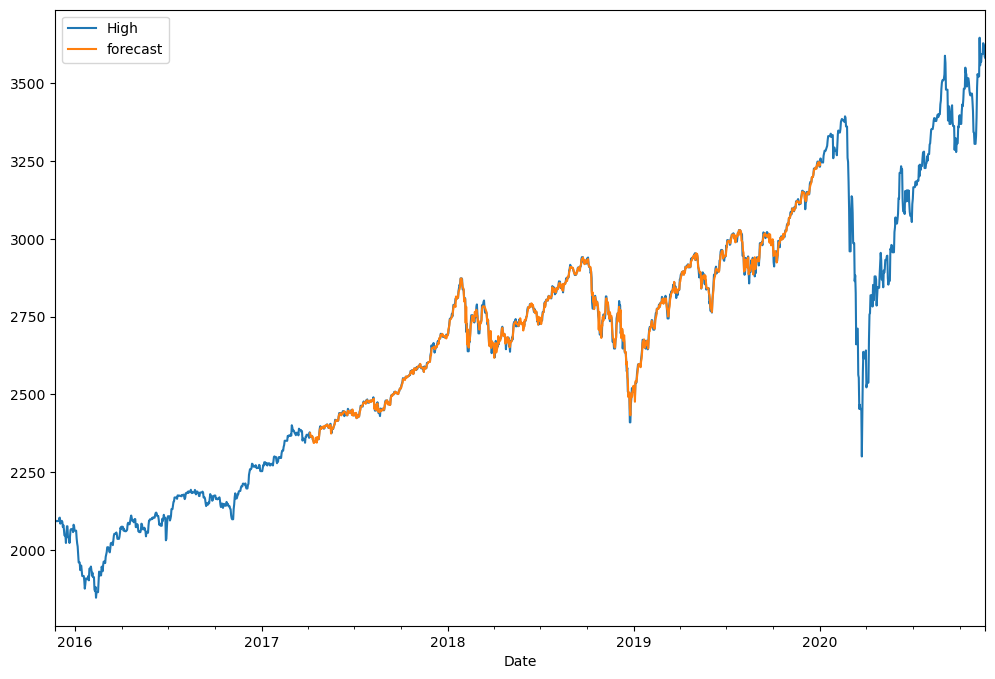

In [27]:
data['forecast'] = results.predict(start = 500,end = 1500,exog = len(data['Adj Close']), dynamic= False)
data[['High','forecast']].plot(figsize=(12,8))

# Making an empty dataset for the future forcast

In [28]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(0, 326)]

In [29]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)
pred_date

,High,Low,Open,Close,Volume,Adj Close,forecast
2020-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2047-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df1 = pred_date.drop(['forecast'], axis = 'columns')
df1

,High,Low,Open,Close,Volume,Adj Close
2020-12-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-20,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2047-08-20,NaN,NaN,NaN,NaN,NaN,NaN
2047-09-20,NaN,NaN,NaN,NaN,NaN,NaN
2047-10-20,NaN,NaN,NaN,NaN,NaN,NaN
2047-11-20,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
values = data['Adj Close'][1500:].values

In [34]:
len(values)

325

In [35]:
import numpy as np

df1['Adjusted Closing Price'] = values
df1

,High,Low,Open,Close,Volume,Adj Close,Adjusted Closing Price
2020-12-20,NaN,NaN,NaN,NaN,NaN,NaN,3230.780029
2021-01-20,NaN,NaN,NaN,NaN,NaN,NaN,3257.850098
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,3234.850098
2021-03-20,NaN,NaN,NaN,NaN,NaN,NaN,3234.850098
2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,3234.850098
...,...,...,...,...,...,...,...
2047-08-20,NaN,NaN,NaN,NaN,NaN,NaN,3626.909912
2047-09-20,NaN,NaN,NaN,NaN,NaN,NaN,3609.530029
2047-10-20,NaN,NaN,NaN,NaN,NaN,NaN,3567.790039
2047-11-20,NaN,NaN,NaN,NaN,NaN,NaN,3581.870117


In [36]:
df2 = df1.drop(['Adj Close'], axis = 'columns')
df2

,High,Low,Open,Close,Volume,Adjusted Closing Price
2020-12-20,NaN,NaN,NaN,NaN,NaN,3230.780029
2021-01-20,NaN,NaN,NaN,NaN,NaN,3257.850098
2021-02-20,NaN,NaN,NaN,NaN,NaN,3234.850098
2021-03-20,NaN,NaN,NaN,NaN,NaN,3234.850098
2021-04-20,NaN,NaN,NaN,NaN,NaN,3234.850098
...,...,...,...,...,...,...
2047-08-20,NaN,NaN,NaN,NaN,NaN,3626.909912
2047-09-20,NaN,NaN,NaN,NaN,NaN,3609.530029
2047-10-20,NaN,NaN,NaN,NaN,NaN,3567.790039
2047-11-20,NaN,NaN,NaN,NaN,NaN,3581.870117


In [37]:
df3 = pd.concat([data,df2])
df3

,High,Low,Open,Close,Volume,Adj Close,forecast,Adjusted Closing Price
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,NaN,NaN
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,NaN,NaN
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,NaN,NaN
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,NaN,NaN
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,NaN,NaN
...,...,...,...,...,...,...,...,...
2047-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3626.909912
2047-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3609.530029
2047-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3567.790039
2047-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3581.870117


In [38]:
df3.dtypes

High                      float64
Low                       float64
Open                      float64
Close                     float64
Volume                    float64
Adj Close                 float64
forecast                  float64
Adjusted Closing Price    float64
dtype: object

In [39]:
df4 = df3.astype({'High':'float','Low':'float','Open':'float', 'Close':'float','Volume':'float'})
df4.dtypes

High                      float64
Low                       float64
Open                      float64
Close                     float64
Volume                    float64
Adj Close                 float64
forecast                  float64
Adjusted Closing Price    float64
dtype: object

# Plotting the Future Forcast

<AxesSubplot:>

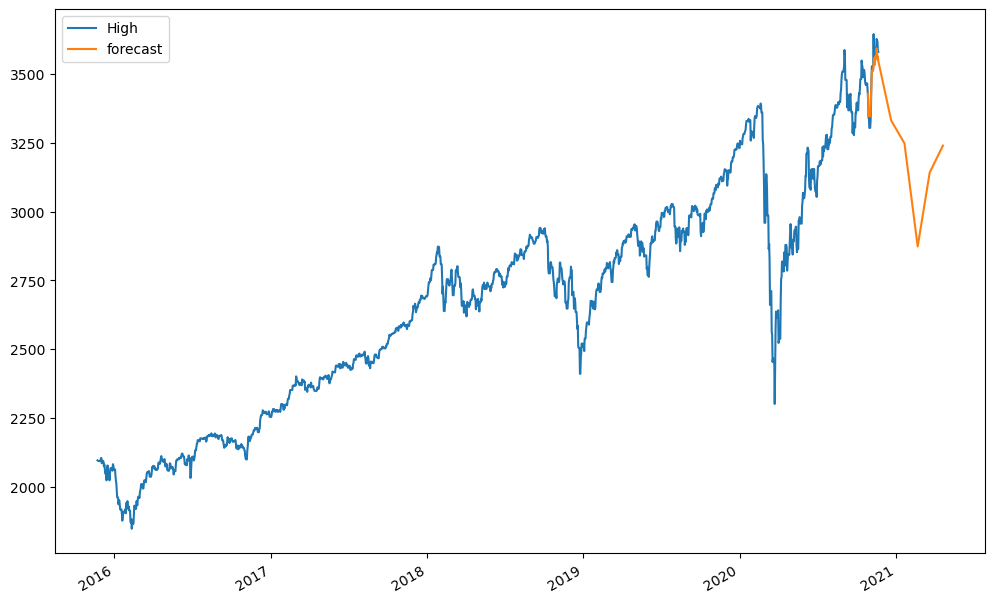

In [40]:
exog_data = df4['Adjusted Closing Price'][1826:2002]
df4['forecast'] = results.predict(start = 1800, end = 2000,exog = exog_data, dynamic= True)  
df4[['High', 'forecast']].plot(figsize=(12, 8))

Based on previous data this is the future trend of stock prices.

                                                                                              -Pranjal Tripathi